In [1]:
from nltk.tokenize import sent_tokenize, word_tokenize, wordpunct_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import pandas as pd
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn import metrics
import pickle
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.cluster import KMeans

In [2]:
raw_data_1 = pd.read_csv("./Preprocessing.csv")

raw_data_1.head(100)

,Nama Paket,Instansi,preprocessing
0,Tenaga Ahli Data Driven Kegiatan Koordinasi Se...,Kementerian Perencanaan Pembangunan Nasional,tenaga ahli data driven kegiatan koordinasi se...
1,Tenaga Ahli IT Analisa Sistem Kegiatan Koord...,Kementerian Perencanaan Pembangunan Nasional,tenaga ahli it analisa sistem kegiatan koordin...
2,Tenaga Ahli Senior Monitoring dan Evaluasi Str...,Kementerian Perencanaan Pembangunan Nasional,tenaga ahli senior monitoring evaluasi strateg...
3,Tenaga Ahli Senior Perencanaan Strategic Natio...,Kementerian Perencanaan Pembangunan Nasional,tenaga ahli senior perencanaan strategic natio...
4,Tenaga Ahli Muda Bidang Energy Policy Kegiatan...,Kementerian Perencanaan Pembangunan Nasional,tenaga ahli muda bidang energy policy kegiatan...
...,...,...,...
95,Pengadaan Generator Set 100 Kva / 80 Kw spse 4...,PDAM Tirta Moedal,pengadaan generator set 100 kva 80 kw spse 4.3...
96,Pengadaan Gate Valve Tahun 2019 Tender Ulang s...,PDAM Tirta Aji Kabupaten Wonosobo,pengadaan gate valve tahun 2019 tender ulang s...
97,Management Pressur Jaringan Distribusi Tender ...,PDAM Tirta Aji Kabupaten Wonosobo,management pressur jaringan distribusi tender ...
98,Pengadaan Pemancar FM 1 KW + Antena + Coaxcial...,Lembaga Penyiaran Radio Republik Indonesia,pengadaan pemancar fm 1 kw antena coaxcial ins...


In [3]:
raw_data_1.shape

(2928, 3)

In [4]:
kmeans_obj = pickle.load(open("kmeans.pickle","rb"))
vectorNormalize = pickle.load(open("vectorNormalize.pickle","rb"))
result_clustering = kmeans_obj.predict(vectorNormalize)

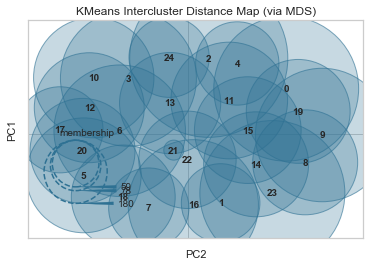

In [5]:
visualizer_kmeans = InterclusterDistance(kmeans_obj, random_state = 50)
visualizer_kmeans.fit(vectorNormalize)
visualizer_kmeans.finalize()

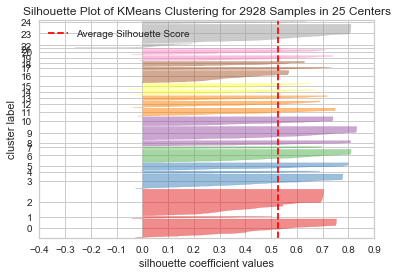

In [6]:
visualizer_kmeans_silhouette = SilhouetteVisualizer(kmeans_obj, color='yellowbrick')
visualizer_kmeans_silhouette.fit(vectorNormalize)
visualizer_kmeans_silhouette.show()

In [7]:
labels = kmeans_obj.labels_
silhouette_score = metrics.silhouette_score(vectorNormalize, labels, metric='euclidean')
silhouette_score

0.5269488524483711

In [8]:
raw_data_1['clustering'] = result_clustering
raw_data_1

,Nama Paket,Instansi,preprocessing,clustering
0,Tenaga Ahli Data Driven Kegiatan Koordinasi Se...,Kementerian Perencanaan Pembangunan Nasional,tenaga ahli data driven kegiatan koordinasi se...,11
1,Tenaga Ahli IT Analisa Sistem Kegiatan Koord...,Kementerian Perencanaan Pembangunan Nasional,tenaga ahli it analisa sistem kegiatan koordin...,15
2,Tenaga Ahli Senior Monitoring dan Evaluasi Str...,Kementerian Perencanaan Pembangunan Nasional,tenaga ahli senior monitoring evaluasi strateg...,11
3,Tenaga Ahli Senior Perencanaan Strategic Natio...,Kementerian Perencanaan Pembangunan Nasional,tenaga ahli senior perencanaan strategic natio...,11
4,Tenaga Ahli Muda Bidang Energy Policy Kegiatan...,Kementerian Perencanaan Pembangunan Nasional,tenaga ahli muda bidang energy policy kegiatan...,2
...,...,...,...,...
2923,Jasa Kebersihan di Lingkungan Sekretariat Kabi...,Sekretariat Kabinet,jasa kebersihan lingkungan sekretariat kabinet...,23
2924,"Pemeliharaan Prasarana TIK (Jaringan Komputer,...",Kementerian Perencanaan Pembangunan Nasional,pemeliharaan prasarana tik jaringan komputer p...,0
2925,Pemeliharaan Sistem Transportasi Gedung spse 3...,Kementerian Perencanaan Pembangunan Nasional,pemeliharaan sistem transportasi gedung spse 3...,0
2926,Pemeliharaan Taman spse 3 Jasa Lainnya - TA 2...,Kementerian Perencanaan Pembangunan Nasional,pemeliharaan taman spse 3 jasa lainnya ta 2014...,0


In [9]:
tfidfVectorizer = TfidfVectorizer()
def search_weights(search_keys):  
    search_query_weights = search_keys.lower()
    tfidf_weights_matrix = tfidfVectorizer.fit_transform(raw_data_1['preprocessing'])
    search_query_weights = tfidfVectorizer.transform([search_keys])

    return search_query_weights, tfidf_weights_matrix

In [10]:
weights_search, tfidf_weights = search_weights('ahli tenaga')
print(weights_search)

  (0, 3132)	0.6983572577284589
  (0, 515)	0.7157493559745527


In [11]:
def cos_similarity(search_query_weights, tfidf_weights_matrix):

    cosine_distance = cosine_similarity(search_query_weights, tfidf_weights_matrix)
    similarity_list = cosine_distance[0]

    return similarity_list

In [12]:
similarity = cos_similarity(weights_search, tfidf_weights)
df = pd.DataFrame({'res':similarity})
df = df.sort_values(by=['res'],ascending=False)

index= []
for i in df.index: 
    index.append(i)

for i in index:
    print(raw_data_1['Nama Paket'].loc[i])
    print('\n')

TENAGA AHLI BIDANG EVALUASI spse 3  Jasa Konsultansi Perorangan - TA 2018 - Seleksi Sederhana - Pascakualifikasi Satu File KualitasNilai Kontrak : Nilai Kontrak belum dibuat


Tenaga Ahli Keuangan Tender Ulang spse 3  Jasa Konsultansi Perorangan - TA 2017 - Seleksi Sederhana - Pascakualifikasi Satu File KualitasNilai Kontrak : Nilai Kontrak belum dibuat


Tenaga Ahli Ekonomi Wilayah spse 4.3  Jasa Konsultansi Perorangan - TA 2019 - Seleksi - Pascakualifikasi Dua File KualitasNilai Kontrak : Nilai Kontrak belum dibuat


Tenaga Ahli KPBU 2 spse 3  Jasa Konsultansi Perorangan - TA 2018 - Seleksi Sederhana - Pascakualifikasi Satu File KualitasNilai Kontrak : Nilai Kontrak belum dibuat


Tenaga Ahli Komunikasi Publik spse 3  Jasa Konsultansi Perorangan - TA 2018 - Seleksi Sederhana - Pascakualifikasi Satu File KualitasNilai Kontrak : Nilai Kontrak belum dibuat


Pengadaan Tenaga Ahli Komunikasi KPPIP spse 3  Jasa Konsultansi Perorangan - TA 2016 - Seleksi Sederhana - Pascakualifikasi Satu F

Tenaga Teknis Bidang Monitoring Dan Evaluasi  Dalam Mendukung Tim Koordinasi Perencanaan Pengendalian Penanganan Bencana (P3B) Tahun 2015 spse 3  Jasa Konsultansi Perorangan - TA 2015 - Seleksi Sederhana - Pascakualifikasi Satu File KualitasNilai Kontrak : Nilai Kontrak belum dibuat


Tenaga Teknis Perencana Kota Kegiatan Strategis Bidang Perkotaan Direktorat Perkotaan, Perumahan dan Permukiman Tahun Anggaran 2017 spse 3  Jasa Konsultansi Perorangan - TA 2017 - Seleksi Sederhana - Pascakualifikasi Satu File KualitasNilai Kontrak : Nilai Kontrak belum dibuat


Tenaga Teknis Perencana Wilayah Kegiatan Strategis Bidang Perkotaan Direktorat Perkotaan, Perumahan dan Permukiman
Tahun Anggaran 2017 spse 3  Jasa Konsultansi Perorangan - TA 2017 - Seleksi Sederhana - Pascakualifikasi Satu File KualitasNilai Kontrak : Nilai Kontrak belum dibuat


Pengadaan Jasa Tenaga Kebersihan  dan Parkir FISIP Undip Bulan Pebruari - Desember Tahun 2019 spse 4.3  Jasa Lainnya - TA 2019 - Tender - Pascakualifik

Jasa Konsultansi Pengurusan Analisis Dampak Lingkungan Pembangunan Gedung Penunjang Siaran Kantor Pusat LPP RRI spse 3  Jasa Konsultansi Badan Usaha - TA 2014 - Seleksi Umum - Prakualifikasi Dua File Kualitas dan BiayaNilai Kontrak : Nilai Kontrak belum dibuat


JASA KONSULTANSI PENYUSUNAN DETAIL ENGINEERING DESIGN (DED) REHABILITASI DAN PENGEMBANGAN GEDUNG SK-9 JALAN KUSUMA ATMAJA NO. 9 MENTENG - JAKARTA PUSAT
 spse 3  Jasa Konsultansi Badan Usaha - TA 2014 - Seleksi Umum - Prakualifikasi Dua File KualitasNilai Kontrak : Nilai Kontrak belum dibuat


Pengadaan Server dan Storage Redundant Backup dan Recovery LPSE dan Server Testing Platform dan Infrastucture Aplikasi e-Proc
 Tender Ulang spse 3  Pengadaan Barang - TA 2014 - Lelang Sederhana - Pascakualifikasi Satu File Harga Terendah Sistem GugurNilai Kontrak : Nilai Kontrak belum dibuat


Jasa Konsultan Assessment Rekrutmen Calon Pegawai Negeri Sipil (CPNS) Kementerian Koordinator Bidang Perekonomian Tahun Anggaran 2014 Seleksi Ulang 



Pekerjaan Rehabilitasi Gedung Kantor (Ruang Kerja Gedung TS2A Lantai 2 dan Lantai 5) spse 3  Pekerjaan Konstruksi - TA 2018 - Lelang Pemilihan Langsung - Pascakualifikasi Satu File Harga Terendah Sistem GugurNilai Kontrak : Nilai Kontrak belum dibuat


Fisik Rehabilitasi/Peningkatan Jalan Ismoyo spse 3  Pekerjaan Konstruksi - TA 2018 - Lelang Pemilihan Langsung - Pascakualifikasi Satu File Harga Terendah Sistem GugurNilai Kontrak : Nilai Kontrak belum dibuat


Pengadaan Jasa Konsultansi Badan Usaha Administrator Independen Penyusunan Laporan Transparansi Industri Ekstraktif Tahun Kalender 2016 Seleksi Ulang spse 3  Jasa Konsultansi Badan Usaha - TA 2018 - Seleksi Umum - Prakualifikasi Dua File KualitasNilai Kontrak : Nilai Kontrak belum dibuat


Fisik Konstruksi Pembangunan IPAL Komunal Kelurahan Magersari spse 3  Pekerjaan Konstruksi - TA 2018 - Lelang Pemilihan Langsung - Pascakualifikasi Satu File Harga Terendah Sistem GugurNilai Kontrak : Nilai Kontrak belum dibuat


Jasa Konsult

Jasa Konsultansi Kajian Valuasi Ekonomi dan Mekanisme Insentif dalam Pengelolaan Lahan Gambut Hibah UKCCU spse 4.3  Jasa Konsultansi Badan Usaha - TA 2019 - Seleksi - Prakualifikasi Dua File Kualitas dan BiayaNilai Kontrak : Nilai Kontrak belum dibuat


PENGADAAN PENAMBAHAN KAPASITAS DISASTER RECOVERY CENTER (DRC) TAHUN 2019 spse 4.3  Pengadaan Barang - TA 2019 - Tender - Pascakualifikasi Satu File Harga Terendah Sistem GugurNilai Kontrak : Nilai Kontrak belum dibuat


Jasa Konsultansi Fasilitasi Penyusunan Dokumen Penyiapan Proyek Kerjasama Pemerintah dengan Badan Usaha Infrastruktur Konektivitas dan Sosial spse 4.3  Jasa Konsultansi Badan Usaha - TA 2019 - Tender - Prakualifikasi Dua File Kualitas dan BiayaNilai Kontrak : Nilai Kontrak belum dibuat


Pengadaan Media Pasir DMI 65 spse 4.3  Pengadaan Barang - TA 2019 - Tender Cepat - Pascakualifikasi Satu File Harga Terendah Sistem GugurNilai Kontrak : Nilai Kontrak belum dibuat


Pengadaan Pipa Sambungan Rumah Baru Tahun 2019 Tender U

Pekerjaan Pengadaan Peningkatan Infrastruktur Sistem Aplikasi Krisna spse 4  Pengadaan Barang - TA 2017 - Tender Cepat - Pascakualifikasi Satu File Harga Terendah Sistem GugurNilai Kontrak : Nilai Kontrak belum dibuat


Pengadaan meter air spse 4  Pengadaan Barang - TA 2017 - Tender Cepat - Pascakualifikasi Satu File Harga Terendah Sistem GugurNilai Kontrak : Nilai Kontrak belum dibuat


Kegiatan Komunikasi Hasil Kajian Penyusunan Konsep Pemindahan Ibu Kota Negara spse 3  Jasa Konsultansi Badan Usaha - TA 2017 - Seleksi Sederhana - Pascakualifikasi Satu File Pagu AnggaranNilai Kontrak : Nilai Kontrak belum dibuat


Pengadaan Peralatan Praktik SMK Negeri 1 Puring spse 4  Pengadaan Barang - TA 2017 - Tender Cepat - Pascakualifikasi Satu File Harga Terendah Sistem GugurNilai Kontrak : Nilai Kontrak belum dibuat


Paket Pengadaan Fasilitasi Sarana Ruang Kreatif Elektronik Wilayah 3 Tender Ulang spse 4  Pengadaan Barang - TA 2017 - Tender Cepat - Pascakualifikasi Satu File Harga Terendah Si